<a href="https://colab.research.google.com/github/OmarFarukNoman/Into-to-Machine-Learning/blob/main/Homework-3/Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Evaluation Metrics:
Accuracy:  0.7922
Precision: 0.7500
Recall:    0.6111
F1 Score:  0.6735

Confusion Matrix Values:
True Negatives (TN):  89
False Positives (FP): 11
False Negatives (FN): 21
True Positives (TP):  33

Final Training and Validation Metrics:
Final Training Loss: 0.4757
Final Validation Loss: 0.4633
Final Training Accuracy: 0.7922
Final Validation Accuracy: 0.7922


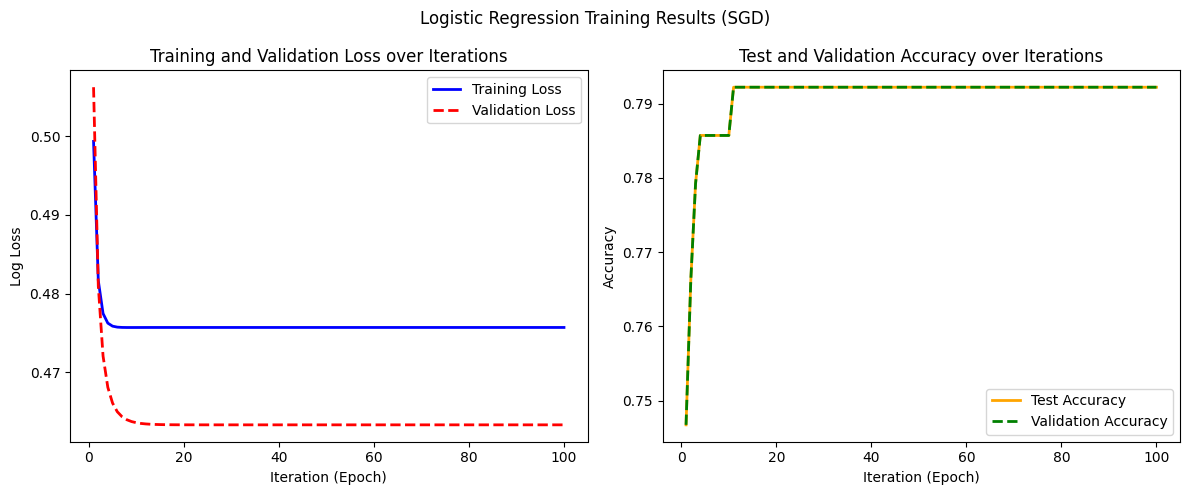

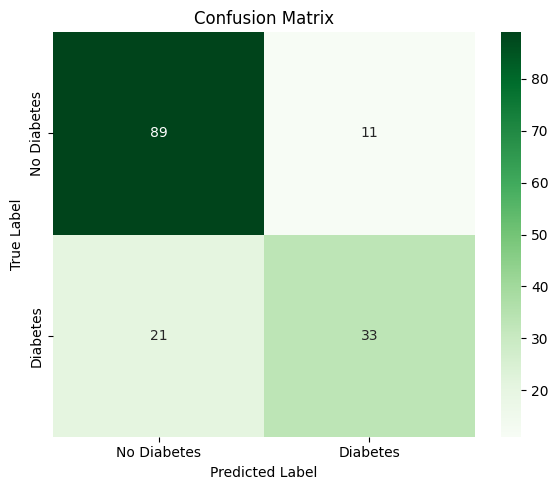

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, log_loss

# We've used diabetes dataset for HW3
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/diabetes.csv"
df = pd.read_csv(url)

# I've separated input features and target
X_in = df.drop('Outcome', axis=1)
y_out = df['Outcome']

# I've splited the data into 80/20 (training/validation)
X_train, X_test, y_train, y_test = train_test_split(X_in, y_out, test_size=0.2, random_state=80, stratify=y_out)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# I've used SGDClassifier with loss='log_loss' that allows us to track metrics per iteration.
sgd_clf = SGDClassifier(
    loss='log_loss',
    max_iter=1,
    random_state=80,
    warm_start=True,
    learning_rate='constant',
    eta0=0.01
)

# Training loop to track metrics over iterations
N_Iterations = 100
train_losses = []
test_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(1, N_Iterations + 1):
    # One ietration of training
    sgd_clf.partial_fit(X_train_scaled, y_train, classes=np.unique(y_train))

    # Training loss (log_loss)
    y_train_pred_proba = sgd_clf.predict_proba(X_train_scaled)
    train_loss = log_loss(y_train, y_train_pred_proba)
    train_losses.append(train_loss)

    # Test accuracy
    y_test_pred_iter = sgd_clf.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred_iter)
    test_accuracies.append(test_accuracy)

    # Validation loss (log_loss on test set)
    y_val_pred_proba = sgd_clf.predict_proba(X_test_scaled)
    val_loss = log_loss(y_test, y_val_pred_proba)
    val_losses.append(val_loss)

    # Validation accuracy
    val_accuracy = accuracy_score(y_test, y_test_pred_iter)
    val_accuracies.append(val_accuracy)

# Final prediction
y_pred = sgd_clf.predict(X_test_scaled)

# Results
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Confusion matrix values
print("\nConfusion Matrix Values:")
print(f"True Negatives (TN):  {cm[0, 0]}")
print(f"False Positives (FP): {cm[0, 1]}")
print(f"False Negatives (FN): {cm[1, 0]}")
print(f"True Positives (TP):  {cm[1, 1]}")

# Final training and validation metrics
print("\nFinal Training and Validation Metrics:")
print(f"Final Training Loss: {train_losses[-1]:.4f}")
print(f"Final Validation Loss: {val_losses[-1]:.4f}")
print(f"Final Training Accuracy: {test_accuracies[-1]:.4f}")
print(f"Final Validation Accuracy: {val_accuracies[-1]:.4f}")

# Results (Loss and Accuracy over Iterations)
plt.figure(figsize=(12, 5))

# Loss over iterations
plt.subplot(1, 2, 1)
plt.plot(range(1, N_Iterations + 1), train_losses, label='Training Loss', color='blue', linewidth=2)
plt.plot(range(1, N_Iterations + 1), val_losses, label='Validation Loss', color='red', linewidth=2, linestyle='--')
plt.title('Training and Validation Loss over Iterations')
plt.xlabel('Iteration (Epoch)')
plt.ylabel('Log Loss')
plt.legend()

# Accuracy over iterations
plt.subplot(1, 2, 2)
plt.plot(range(1, N_Iterations + 1), test_accuracies, label='Test Accuracy', color='orange', linewidth=2)
plt.plot(range(1, N_Iterations + 1), val_accuracies, label='Validation Accuracy', color='green', linewidth=2, linestyle='--')
plt.title('Test and Validation Accuracy over Iterations')
plt.xlabel('Iteration (Epoch)')
plt.ylabel('Accuracy')
plt.legend()
plt.suptitle('Logistic Regression Training Results (SGD)')
plt.tight_layout()
plt.show()

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()